In [52]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [20]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

#plt.show()

### Simulation Based Approach
* Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
* Theory: Our population is the 1000 tickets we have manufactured
* Implementation: Create a boolean pandas Series
 * we model win with true and lose with false
 * because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.30


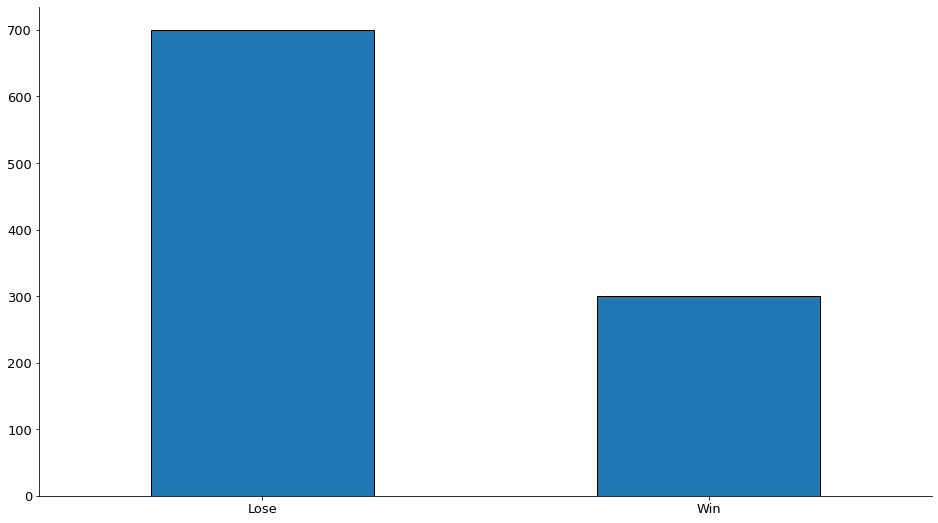

In [22]:
tickets = pd.Series([True] * 300 + [False] * 700)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

Scenario: Each student in a classroom is given a Golden Cody scratch off at random
Theory

We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

Examples of biased samples:

non-response: people that don't respond are a diff population
undercoverage: some groups aren't well represented
voluntary: people volunteer for surveys
leading questions
social desirability
Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [25]:
n = 25
tickets.sample(n).mean()

0.32

In [26]:
[tickets.sample(n).mean() for _ in range(5)]

[0.4, 0.16, 0.2, 0.28, 0.44]

Theory

The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

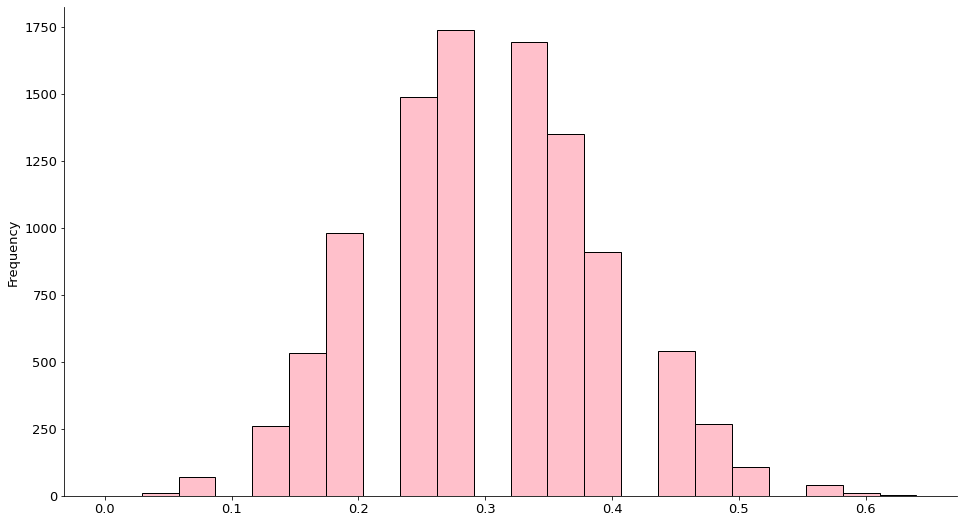

In [33]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=22,color='pink')

Theory

The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

Mini Exercise -- CLT
Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [31]:
# Theoretical average of 6 dice rolls: 3.5

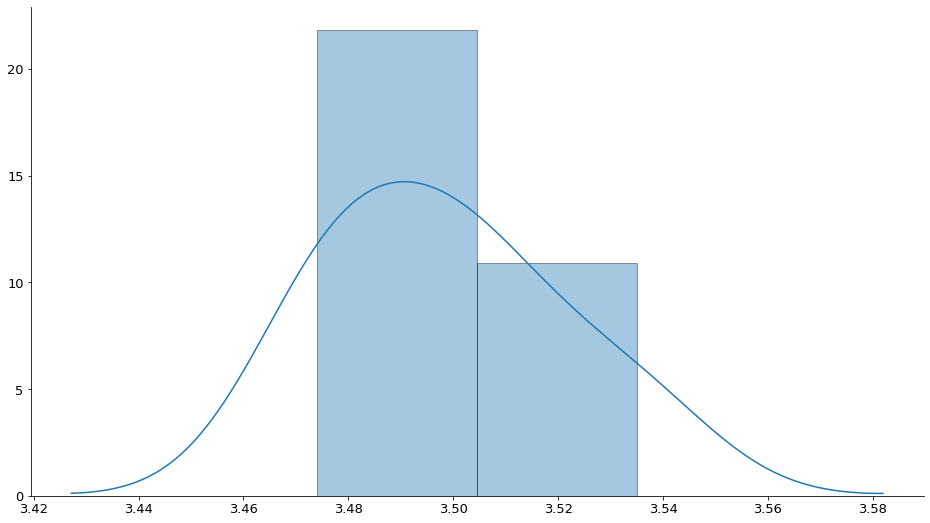

In [61]:
rolls1 = np.random.choice([1, 2, 3, 4, 5, 6], size=10_000)
rolls2 = np.random.choice([1, 2, 3, 4, 5, 6], size=10_000)
rolls3 = np.random.choice([1, 2, 3, 4, 5, 6], size=10_000)
rolls4 = np.random.choice([1, 2, 3, 4, 5, 6], size=10_000)
rolls5 = np.random.choice([1, 2, 3, 4, 5, 6], size=10_000)
rolls6 = np.random.choice([1, 2, 3, 4, 5, 6], size=10_000)

rolls = np.array([rolls1,rolls2,rolls3,rolls4,rolls5,rolls6])

#avgrolls = np.mean(rolls)


six_dice_rolls = ([np.mean(rolls1),
                   np.mean(rolls2),
                   np.mean(rolls3),
                   np.mean(rolls4),
                   np.mean(rolls5),
                   np.mean(rolls6)]) 
six_dice_rolls

sns.distplot(six_dice_rolls)
#sns.distplot(avgrolls)

In [62]:
# The underlying distribution is a normal distribution.

In [63]:
se = math.sqrt((.25 * .75) / n)

In [64]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0906


In [65]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.13340021715296063

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.

Null and Alternative Hypothesis
H0: status quo: no difference or no effect
Ha: alternative: there is a difference or effect
whether Ha is ≠, <, >, determines one-tailed vs two-tailed test
< or > == one-tailed
≠ == two-tailed

### Mini Exercise -- Null + Alternate Hypothesis and Errors
* For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.
 * Are the average grades in web development vs data science classes different?
 * Is there a relationship between how early a student shows up to class and their grade?
 * Are web dev or data science students more likely to be coffee drinkers?

#### My Answers
* Are the average grades in web development vs data science classes different?
-->
 * Null Hypothesis: The averages grades of web deb and data science are the same.

### Exercise from Overview

* For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

 * Has the network latency gone up since we switched internet service providers?
 * Is the website redesign any good?
 * Is our television ad driving more sales?

#### My Answers:

* Has the network latency gone up since we switched internet service providers?
-->
 * 

### T-Test Exercises

* Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

* Load the mpg dataset and use it to answer the following questions:

 * Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
 * Are compact cars more fuel-efficient than the average car?
 * Do manual cars get better gas mileage than automatic cars?

#### My Answers:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?